## CNN Implementation

In this notebook, we will learn how to implement *Convolution Neural Networks* for Dog and Cat image recognition. We are going to use **Tensorflow** and **Keras** libraries to implement this.

#### Importing Required Modules

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
from keras.models import load_model
import numpy as np

#### Setting up Environment

In [2]:
# It holds some dependencies which the model to run on GPU's
# ! pip install tensorflow-gpu

In [3]:
# Check if a GPU is available
if tf.config.list_physical_devices('GPU'):
    print('GPU device found')
else:
    print('No GPU device found, using CPU')

No GPU device found, using CPU


In [4]:
# Set the desired GPU device
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Set memory growth to avoid allocation issues
        tf.config.experimental.set_memory_growth(gpus[0], True)
        # Set the desired GPU device
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    except RuntimeError as e:
        print(e)

#### Data Pre-Processing

In [5]:
# Dataset: https://drive.google.com/drive/folders/1NiY3pngfzYZGQp2VJfnDPM-3qR43BN9-?usp=drive_link
training_set = image_dataset_from_directory(
               directory = r"dataset/training_set",
               image_size = (64, 64),
               batch_size = 32,
               )

Found 8000 files belonging to 2 classes.


In [6]:
# Dataset: https://drive.google.com/drive/folders/1NiY3pngfzYZGQp2VJfnDPM-3qR43BN9-?usp=drive_link
test_set = image_dataset_from_directory(
               directory = r"dataset/test_set",
               image_size = (64, 64),
               batch_size = 32,
               )

Found 2000 files belonging to 2 classes.


In [7]:
len(training_set)

250

In [8]:
class_names = training_set.class_names
print(F"Class Names: {class_names}")

Class Names: ['cats', 'dogs']


#### Visualizing the Data

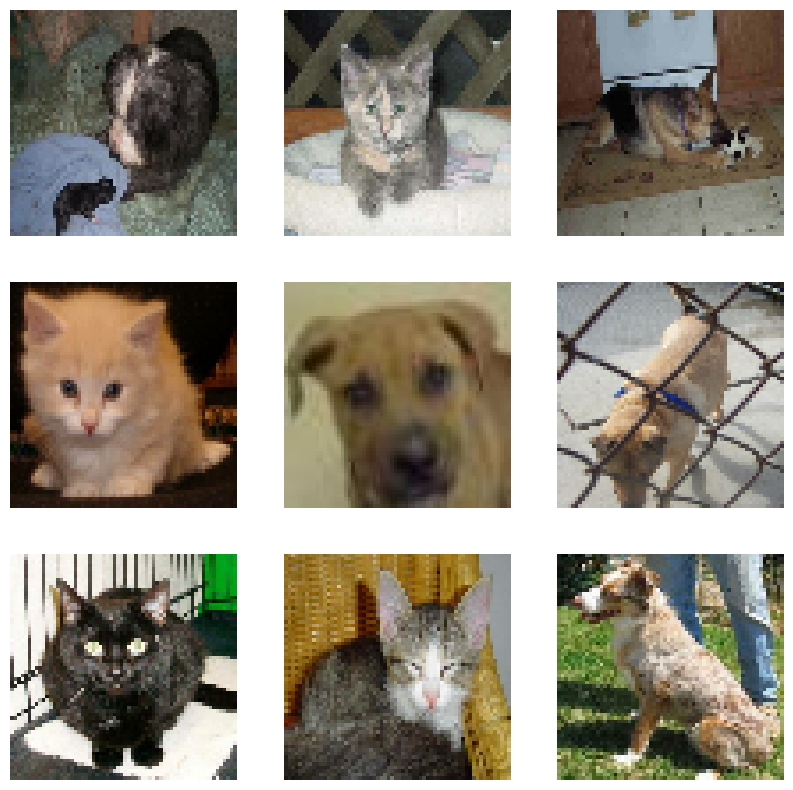

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in training_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

#### Configuring the data for better performance

Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data:

**Dataset.cache** keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

**Dataset.prefetch** overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = training_set.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = test_set.cache().prefetch(buffer_size=AUTOTUNE)

#### Building CNN model

In [11]:
model = tf.keras.models.Sequential()

The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small.
Here, you will standardize values to be in the [0, 1] range by using tf.keras.layers.Rescaling.

In [12]:
model.add(tf.keras.layers.Rescaling(1./255))

`tf.keras.layers.Conv2D`: This is the type of layer being added, which is a 2D convolutional layer. Convolutional layers are commonly used in computer vision tasks to extract features from images.

`filters=32`: This parameter specifies the number of filters (also known as kernels) in the convolutional layer. Filters are small matrices that slide over the input image, and each filter produces a feature map by computing a dot product between its weights and a corresponding region of the input.

`kernel_size=3`: This parameter determines the size of the filters. In this case, the filters will have a spatial size of 3x3 pixels. The kernel size specifies how much local information is taken into account when calculating each element of the feature map.

`activation="relu"`: This parameter sets the activation function used in the layer. "relu" stands for Rectified Linear Unit, which is a commonly used activation function in neural networks. It introduces non-linearity to the model by replacing negative values with zeros and keeping positive values unchanged.

`input_shape=[64, 64, 3]`: This parameter defines the shape of the input to the convolutional layer. In this case, the input is expected to be a 3D tensor with a shape of [64, 64, 3]. The first two dimensions represent the height and width of the input image, and the last dimension represents the number of color channels (3 for RGB images).

To summarize, the code adds a 2D convolutional layer with 32 filters of size 3x3 pixels to the neural network model. The "relu" activation function is applied to the output of this layer, and the expected input shape is [64, 64, 3].

In [13]:
# Adding convolutional layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=[64, 64, 3]))

In [14]:
# Adding pooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [15]:
# Adding second convolution layer and pooling layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [16]:
# Adding Flattening layer
model.add(tf.keras.layers.Flatten())

In [17]:
# Adding fully connected hidden layer
model.add(tf.keras.layers.Dense(units=128, activation="relu"))

In [18]:
# Adding fully connected output layer
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

#### Compiling, Training & Validating the model

In [19]:
# Compiling the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Accuracy"])

In [62]:
# Training and Validating the model
model.fit(x=training_set, validation_data=test_set, epochs=10)

Epoch 1/10
250/250 [==============================] - 49s 193ms/step - loss: 0.2762 - Accuracy: 0.8816 - val_loss: 0.7019 - val_Accuracy: 0.7350
Epoch 2/10
250/250 [==============================] - 53s 212ms/step - loss: 0.2014 - Accuracy: 0.9231 - val_loss: 0.8225 - val_Accuracy: 0.7115
Epoch 3/10
250/250 [==============================] - 57s 227ms/step - loss: 0.1279 - Accuracy: 0.9528 - val_loss: 1.0199 - val_Accuracy: 0.7155
Epoch 4/10
250/250 [==============================] - 56s 223ms/step - loss: 0.0806 - Accuracy: 0.9745 - val_loss: 1.1494 - val_Accuracy: 0.7235
Epoch 5/10
250/250 [==============================] - 49s 195ms/step - loss: 0.0664 - Accuracy: 0.9804 - val_loss: 1.2301 - val_Accuracy: 0.7115
Epoch 6/10
250/250 [==============================] - 52s 207ms/step - loss: 0.0385 - Accuracy: 0.9887 - val_loss: 1.3041 - val_Accuracy: 0.7220
Epoch 7/10
250/250 [==============================] - 53s 209ms/step - loss: 0.0379 - Accuracy: 0.9883 - val_loss: 1.4912 - val_Ac

In [63]:
model.save("dog_cat_cls_model_v1.h5")

### Prediction

In [64]:
loaded_model = load_model('dog_cat_cls_model_v1.h5')

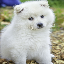

In [77]:
test_image = image.load_img("dataset/single_prediction/cat_or_dog_3.jpeg", target_size=(64, 64))
test_image

In [78]:
test_image = image.img_to_array(test_image)
test_image.shape

(64, 64, 3)

In [79]:
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

(1, 64, 64, 3)

In [80]:
result = loaded_model.predict(test_image)

1/1 [==============================] - 0s 39ms/step


In [81]:
if result[0][0] > 0.5:
    print("dog")
else:
    print("Cat")

dog


#### Resource

<ul>
  <li><a href="https://www.tensorflow.org/tutorials/load_data/images">Load and preprocess images for tensorflow documentation</a></li>
</ul>